In [83]:
import csv
import numpy as np
import math as ma
import pandas as pd
import plotly.express as px

In [125]:
video_game_df = pd.read_csv(r'Data/vg_df.csv')

In [126]:
vg_df = video_game_df.copy()

In [127]:
vg_df = vg_df[vg_df['critic_score'].notna()]

In [128]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12495 entries, 3 to 57940
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             12495 non-null  object 
 1   console           12495 non-null  object 
 2   genre_x           12495 non-null  object 
 3   publisher         12495 non-null  object 
 4   developer_x       12495 non-null  object 
 5   critic_score      12495 non-null  float64
 6   total_sales       9026 non-null   float64
 7   release_date_x    12457 non-null  object 
 8   NA_Sales          6923 non-null   float64
 9   EU_Sales          6923 non-null   float64
 10  JP_Sales          6923 non-null   float64
 11  Other_Sales       6923 non-null   float64
 12  Global_Sales      6923 non-null   float64
 13  Critic_Count      6866 non-null   float64
 14  User_Count        6923 non-null   float64
 15  Rating            6851 non-null   object 
 16  number_players    1698 non-null   object

In [129]:
vg_df = vg_df[~vg_df.user_score.str.contains('tbd')]
vg_df["user_score"] = vg_df["user_score"].map(lambda x: float(x))

AttributeError: Can only use .str accessor with string values!

In [130]:
vg_df.loc[ : ,'user_score'] = pd.to_numeric(vg_df['user_score'], errors='coerce')

In [131]:
print(len(vg_df))
print(vg_df['total_sales'].isna().sum())

print(vg_df['critic_score'].isna().sum())
print(vg_df['user_score'].isna().sum())

12495
3469
0
2767


In [132]:
vg_df = vg_df[vg_df['total_sales'].notna()]

In [133]:
vg_df

,title,console,genre_x,publisher,developer_x,critic_score,total_sales,release_date_x,NA_Sales,EU_Sales,...,neutral_users,negative_users,user_score,Title,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players
3,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,94.0,20.32,2013-09-17,7.02,9.09,...,NaN,NaN,82.0,Grand Theft Auto V,RockstarNorth,Modern;Action Adventure;Modern;Open-World,PS3,97.0,83.0,Up to 16
5,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,97.0,19.39,2014-11-18,3.96,6.31,...,71.0,69.0,83.0,Grand Theft Auto V,RockstarNorth,Action Adventure;Modern;Open-World,PS4,97.0,83.0,Up to 30
6,Grand Theft Auto: San Andreas,PS2,Action,Rockstar Games,Rockstar North,95.0,20.81,2004-10-26,9.43,0.40,...,NaN,NaN,90.0,Grand Theft Auto: San Andreas,RockstarNorth,Action Adventure;Modern,PS2,95.0,90.0,1-2
7,Uncharted 4: A Thief's End,PS4,Action,Sony Interactive Entertainment,Naughty Dog,92.0,5.38,2016-05-10,1.85,2.50,...,148.0,68.0,79.0,Uncharted 4: A Thief's End,NaughtyDog,General;Modern;Action Adventure;Linear,PS4,93.0,83.0,Up to 10
8,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,96.0,16.15,2002-10-28,8.41,5.49,...,NaN,NaN,87.0,Grand Theft Auto: Vice City,RockstarNorth,Action Adventure;Modern,PS2,95.0,88.0,1 Player
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57617,Root Letter,PS4,Visual Novel,PQube,Kadokawa Games,69.0,0.03,2016-11-10,0.00,0.00,...,1.0,1.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57618,Steins;Gate Elite,PS4,Visual Novel,Spike Chunsoft,5pb. Inc.,86.0,0.03,2019-02-19,NaN,NaN,...,0.0,0.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,No Online Multiplayer
57641,428: Shibuya Scramble,PS4,Visual Novel,Spike Chunsoft,Abstraction Games,85.0,0.02,2018-09-04,NaN,NaN,...,0.0,0.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,No Online Multiplayer
57671,Chaos;Child,PS4,Visual Novel,PQube,5pb. Inc.,76.0,0.02,2017-10-24,NaN,NaN,...,0.0,0.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,No Online Multiplayer


In [134]:
group = vg_df.groupby(['genre_x'])
group.agg(['mean', 'std', 'count'])['critic_score']

,mean,std,count
genre_x,,,
Action,66.569075,14.832802,1578
Action-Adventure,73.180791,12.236824,177
Adventure,69.071174,14.234924,562
Board Game,53.000000,NaN,1
Education,75.000000,NaN,1
Fighting,71.087500,13.985552,480
MMO,80.583333,9.672537,24
Misc,66.996109,14.987584,514
Music,76.603448,8.100118,58


In [135]:
vg_df = vg_df[~vg_df.genre_x.str.contains('Board Game|Education|MMO|Party|Sandbox|Visual Novel')]

In [136]:
group = vg_df.groupby(['genre_x'])
group.agg(['mean', 'std', 'count'])['critic_score']

,mean,std,count
genre_x,,,
Action,66.569075,14.832802,1578
Action-Adventure,73.180791,12.236824,177
Adventure,69.071174,14.234924,562
Fighting,71.087500,13.985552,480
Misc,66.996109,14.987584,514
Music,76.603448,8.100118,58
Platform,69.813333,13.462065,600
Puzzle,70.842640,12.500229,197
Racing,69.357520,14.142328,758


In [137]:
vg_df.loc[vg_df['critic_score'] == vg_df['critic_score'].min()]



,title,console,genre_x,publisher,developer_x,critic_score,total_sales,release_date_x,NA_Sales,EU_Sales,...,neutral_users,negative_users,user_score,Title,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players
2272,Kabuki Warriors,XB,Action,Crave Entertainment,Light Weight,10.0,0.06,2001-11-19,0.05,0.01,...,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37603,Risen 3: Titan Lords Enhanced Edition,PS4,Role-Playing,Deep Silver,Piranha Bytes,10.0,0.07,2015-08-21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
# group_pub = vg_df.groupby(['publisher'])
# group_pub.agg(['count'])['title']
#vg_df[vg_df['title'].count() > 3].groupby('publisher')['title'].count()


vg_df.publisher.value_counts().reset_index(name="count").query("count > 28")["index"]


0                            Electronic Arts
1                                    Ubisoft
2                                 Activision
3                                  EA Sports
4                                       Sega
5                                        THQ
6                                   Nintendo
7                Sony Computer Entertainment
8                                     Capcom
9                                     Konami
10                                     Atari
11                               Square Enix
12                                     Atlus
13                              Midway Games
14                         Eidos Interactive
15                                 2K Sports
16                              Namco Bandai
17                               Codemasters
18                                 LucasArts
19                                     Namco
20                                  2K Games
21                     Acclaim Entertainment
22    Warn

In [148]:
pubs = np.sort(vg_df['publisher'].unique())

# pubs.to_csv('pubs.csv', index=False) 

# np.savetxt("pubs.csv", pubs, delimiter = ",")

pd.DataFrame(pubs).to_csv("pubs.csv")

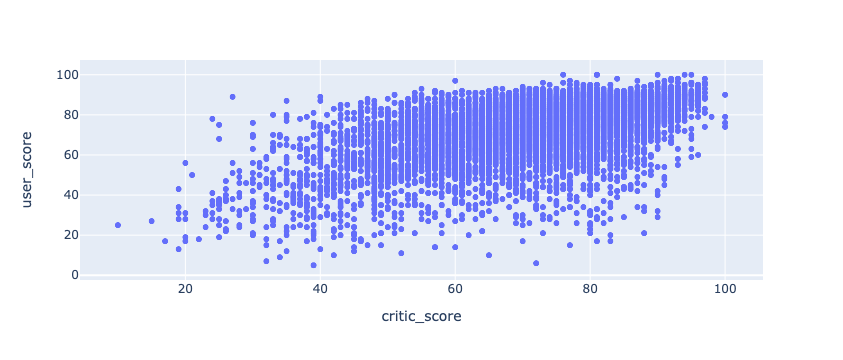

In [142]:
fig = px.scatter(vg_df, x='critic_score', y='user_score', hover_data=['title'])
fig.show()